In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pickle

In [3]:
train = pd.read_csv('../../data/Preprocessed_data/ViCTSD_train.csv')
X_train = train['texts']
y_train = train['toxicity']

In [4]:
test = pd.read_csv('../../data/Preprocessed_data/ViCTSD_test.csv')
X_test = test['texts']
y_test = test['toxicity']

In [5]:
train

,texts,toxicity
0,tuyệt_vời ... ! ! !,0
1,"mỹ tuột_dốc rồi , vực dậy",0
2,"lái_xe hơi bấm còi "" rất "" lịch "" quá "" văn mi...",1
3,coi dịch giặc . xâm_nhập việt nam đầu_hàng cút...,0
4,thương bé quá ! rời mẹ ! chia buồn gia_đình co...,0
...,...,...
6995,"đọc đau quá , thảm nạn xãy hoài , mà kho ngăn ...",0
6996,mua nhé . bảo_vệ sức_khoẻ 34 bệnh_lý nghiêm_tr...,0
6997,luật sử_dụng ma_tuý phạm_tội tiếp kẻ buôn trái...,0
6998,"mua_fadil lăn bánh . đắt đi morning , i10 dư t...",0


In [6]:
X_train = X_train.fillna("")
X_test = X_test.fillna("")

In [7]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
# Huấn luyện mô hình SVM
svm_model = SVC(kernel='rbf',class_weight="balanced", C=1.2)
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

# Convert the sparse matrix to a dense NumPy array
X_test_dense = X_test_tfidf.toarray()

# perm_importance = permutation_importance(svm_model, X_test_dense, y_test) # Use the dense array here
# features = np.array(feature_names)
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

# Đánh giá mô hình SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("f1-score:", f1_score(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       890
           1       0.53      0.18      0.27       110

    accuracy                           0.89      1000
   macro avg       0.72      0.58      0.61      1000
weighted avg       0.86      0.89      0.87      1000

SVM Accuracy: 0.892
f1-score: 0.2702702702702703


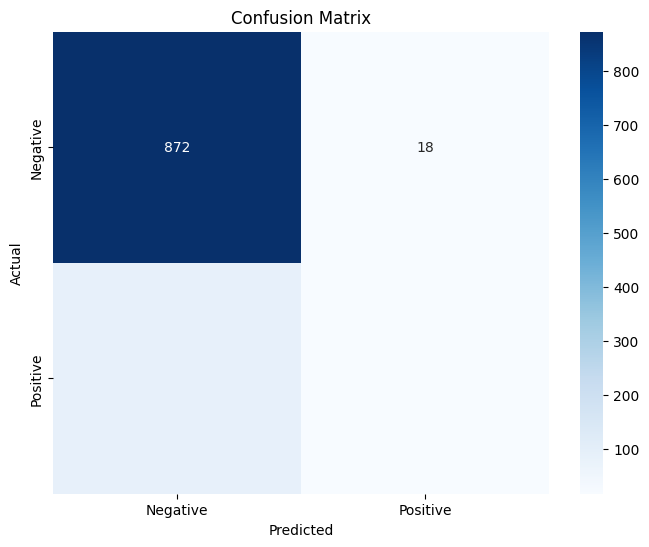

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Giả sử bạn đã có y_test và y_pred
# y_test: nhãn thực tế
# y_pred: nhãn dự đoán từ mô hình

# Tính toán confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [10]:
cm

array([[872,  18],
       [ 90,  20]], dtype=int64)

In [ ]:
# Lưu mô hình SVM
with open('./svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Lưu vectorizer
with open('./vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)